The dataset has been extracted from goodreads and contains following columns:

* BookID
* Title
* Authors
* Average Rating
* isbn
* isbn13
* Language Code
* Number of pages
* Rating count
* text review count
* Publishing date
* Publisher


Importing libraries and dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df=pd.read_csv("/content/books.csv", error_bad_lines = False,warn_bad_lines=False)

In [3]:
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7     num_pages         11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


In [5]:
df.shape

(11123, 12)

It has 11123 rows and 12 columns.

In [6]:
df.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', '  num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

In [7]:
df.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,21310.856963,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,13094.727252,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,32104.500000,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


In [8]:
df.isnull().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

There are no null values.

In [9]:
df.corr()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
bookID,1.000000,-0.036207,-0.002185,-0.026134,-0.076820,-0.081289
average_rating,-0.036207,1.000000,-0.001965,0.150477,0.038224,0.033663
isbn13,-0.002185,-0.001965,1.000000,-0.009818,0.005494,0.008152
num_pages,-0.026134,0.150477,-0.009818,1.000000,0.034337,0.036977
ratings_count,-0.076820,0.038224,0.005494,0.034337,1.000000,0.865977
text_reviews_count,-0.081289,0.033663,0.008152,0.036977,0.865977,1.000000


There is 86% positive correlation between ratings_count and text_reviews_count.

In [10]:
df.columns=df.columns.str.strip()

Make a copy of the original dataframe.

In [11]:
df_cpy=df.copy()

Checking the unique values of language_code column.

In [12]:
df_cpy.language_code.unique()

array(['eng', 'en-US', 'fre', 'spa', 'en-GB', 'mul', 'grc', 'enm',
       'en-CA', 'ger', 'jpn', 'ara', 'nl', 'zho', 'lat', 'por', 'srp',
       'ita', 'rus', 'msa', 'glg', 'wel', 'swe', 'nor', 'tur', 'gla',
       'ale'], dtype=object)

Replacing the terms by original names.

In [13]:
df_cpy.language_code.replace(to_replace=['eng', 'en-US', 'fre', 'spa', 'en-GB', 'mul', 'grc', 'enm',
       'en-CA', 'ger', 'jpn', 'ara', 'nl', 'zho', 'lat', 'por',
       'srp', 'ita', 'rus', 'msa', 'glg', 'wel', 'swe', 'nor', 'tur',
       'gla', 'ale'],value=['English','US-English','French','Spanish','British-English','Multiple language','Greek','Middle English','Canada-English',
       'German','japanese','arabic','Dutch','Chinese','Latvian','Portuguese','Serbian','Initial teaching language',
       'russian','Modern Standard Arabic','Galician','Welsh','Swedish','Murik','Turkish','Gaelic','Afro-Asiatic'],inplace=True)

In [14]:
df_cpy=df_cpy.rename(columns={'language_code':'language'})

In [15]:
df_cpy.language.unique()

array(['English', 'US-English', 'French', 'Spanish', 'British-English',
       'Multiple language', 'Greek', 'Middle English', 'Canada-English',
       'German', 'japanese', 'arabic', 'Dutch', 'Chinese', 'Latvian',
       'Portuguese', 'Serbian', 'Initial teaching language', 'russian',
       'Modern Standard Arabic', 'Galician', 'Welsh', 'Swedish', 'Murik',
       'Turkish', 'Gaelic', 'Afro-Asiatic'], dtype=object)

In [16]:
df_cpy['publication_year'] = df_cpy['publication_date'].apply(lambda x: (int)(str(x[-4:])))

In [17]:
df_cpy

,bookID,title,authors,average_rating,isbn,isbn13,language,num_pages,ratings_count,text_reviews_count,publication_date,publisher,publication_year
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,English,652,2095690,27591,9/16/2006,Scholastic Inc.,2006
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,English,870,2153167,29221,9/1/2004,Scholastic Inc.,2004
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,English,352,6333,244,11/1/2003,Scholastic,2003
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,English,435,2339585,36325,5/1/2004,Scholastic Inc.,2004
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,English,2690,41428,164,9/13/2004,Scholastic,2004
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11118,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9781560254416,English,512,156,20,12/21/2004,Da Capo Press,2004
11119,45633,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,9780140110876,English,635,783,56,12/1/1988,Penguin Books,1988
11120,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9780140131963,English,415,820,95,8/1/1993,Penguin Books,1993
11121,45639,Poor People,William T. Vollmann,3.72,0060878827,9780060878825,English,434,769,139,2/27/2007,Ecco,2007


In [18]:
avg_rating=round(df_cpy['average_rating'].mean(),2)
avg_num=round(df_cpy['num_pages'].mean(),2)

print(f"The average ratings of the book are:{avg_rating}.\nThe average number of pages are:{avg_num}. ")

The average ratings of the book are:3.93.
The average number of pages are:336.41. 


In [19]:
lang=df_cpy['language'].value_counts().idxmax()
pub=df_cpy['publisher'].value_counts()

print(f'\033[1m{lang} \033[0m has most books written in it.\n\033[1m{pub.idxmax()} \033[0m has the most publications.')

English  has most books written in it.
Vintage  has the most publications.


In [20]:
auth =df_cpy['authors'].value_counts()[0:12]
print(auth)

P.G. Wodehouse                 40
Stephen King                   40
Rumiko Takahashi               39
Orson Scott Card               35
Agatha Christie                33
Piers Anthony                  30
Sandra Brown                   29
Mercedes Lackey                29
Dick Francis                   28
Terry Pratchett                23
Laurell K. Hamilton            23
Margaret Weis/Tracy Hickman    23
Name: authors, dtype: int64


Authors with most number of books published

Top 5 authors

In [60]:
auth2 =df_cpy['authors'].value_counts()[0:5]
print(auth2)

P.G. Wodehouse      40
Stephen King        40
Rumiko Takahashi    39
Orson Scott Card    35
Agatha Christie     33
Name: authors, dtype: int64


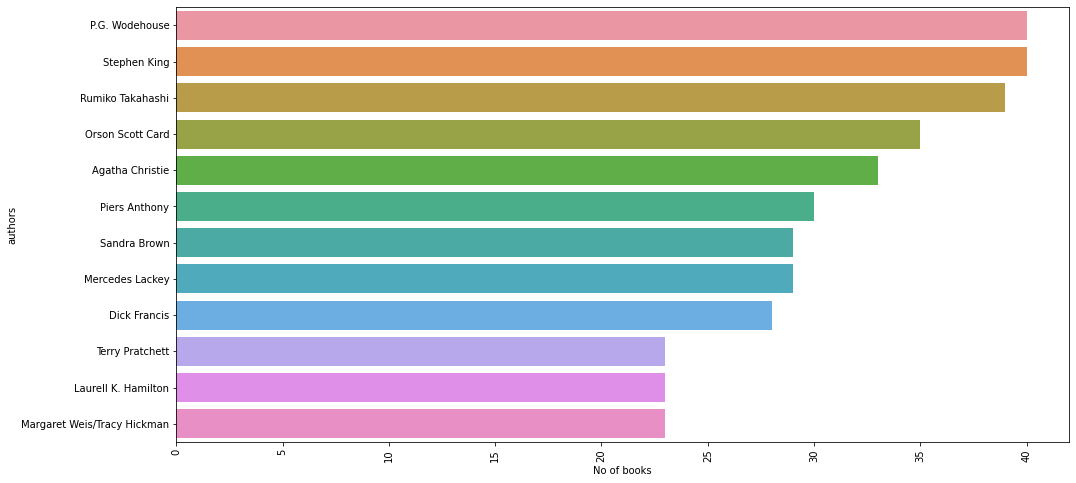

In [21]:
plt.figure(figsize=(16,8))
sns.barplot(x=auth,y=auth.index)
plt.xticks(rotation=90)
plt.ylabel('authors')
plt.xlabel('No of books')
plt.show()

Publishing house with most number of books published

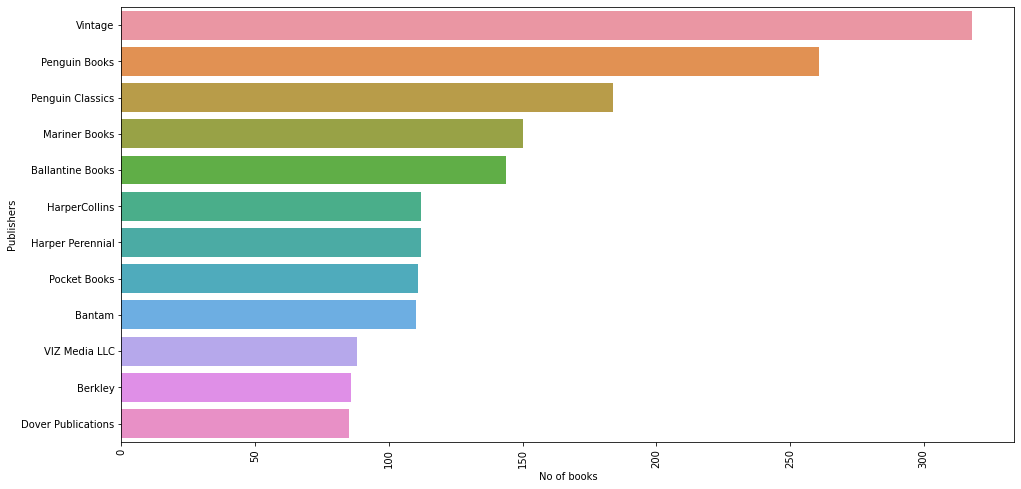

In [22]:
plt.figure(figsize=(16,8))
sns.barplot(x=pub[0:12],y=pub[0:12].index)
plt.xticks(rotation=90)
plt.ylabel('Publishers')
plt.xlabel('No of books')
plt.show()

Top Publication years

In [23]:
print(df_cpy.publication_year.unique())
year=df_cpy['publication_year'].value_counts()[0:12]
print(year)

[2006 2004 2003 2005 2002 1996 2001 2000 1990 1993 1997 1991 2012 1994
 1982 1986 1999 1987 1984 2007 1965 1998 1995 1964 1970 2011 1955 1988
 1985 1989 1963 2008 2009 1976 1975 1980 1992 1973 2019 1954 2015 1919
 1921 1923 1969 1968 1961 1953 1958 1983 1978 1929 1977 1979 1922 1981
 2010 1950 1971 1960 1959 2013 2017 2016 1972 1947 1943 1974 1957 2014
 2018 1952 1935 1956 1966 1925 1962 1949 1913 1928 1914 1948 1967 1900
 2020 1931 1940]
2006    1700
2005    1260
2004    1069
2003     931
2002     798
2001     656
2000     534
2007     518
1999     450
1998     396
1997     290
1996     250
Name: publication_year, dtype: int64


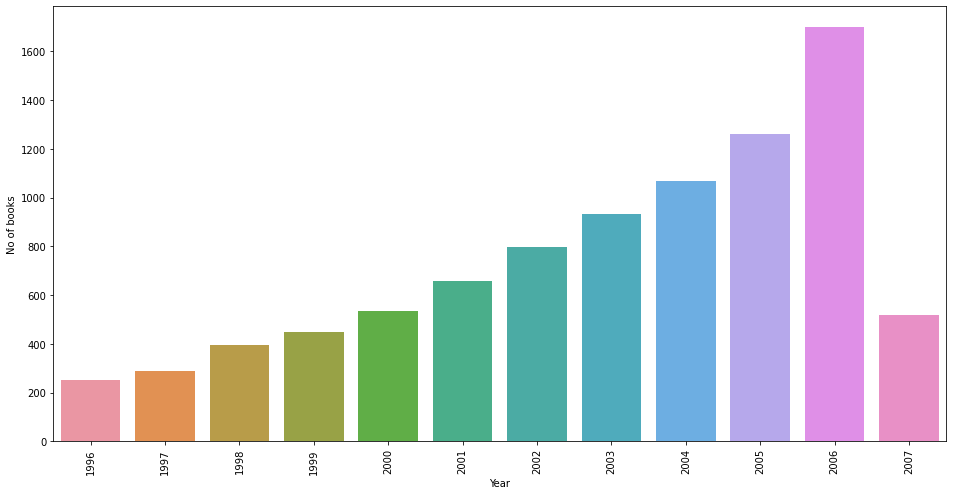

In [24]:
plt.figure(figsize=(16,8))
sns.barplot(x=year.index,y=year)
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('No of books')
plt.show()

Year 2006 marks the highest number of books published

In [25]:
sorted_lang=df_cpy['language'].value_counts()[0:10]
print(sorted_lang)

English              8908
US-English           1408
Spanish               218
British-English       214
French                144
German                 99
japanese               46
Multiple language      19
Chinese                14
Greek                  11
Name: language, dtype: int64


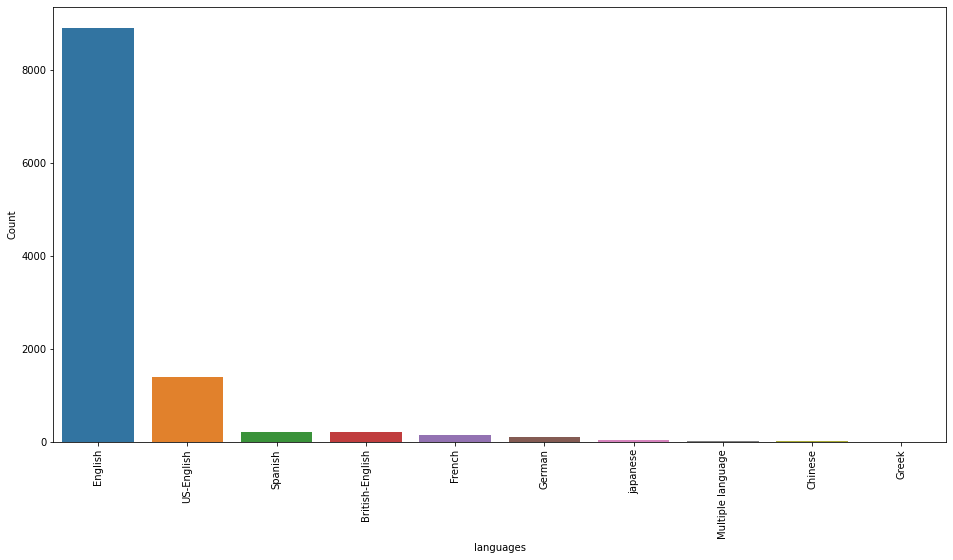

In [26]:
plt.figure(figsize=(16,8))
sns.barplot(x=sorted_lang.index,y=sorted_lang)
plt.xticks(rotation=90)
plt.xlabel('languages')
plt.ylabel('Count')
plt.show()

English language has the maximum count.

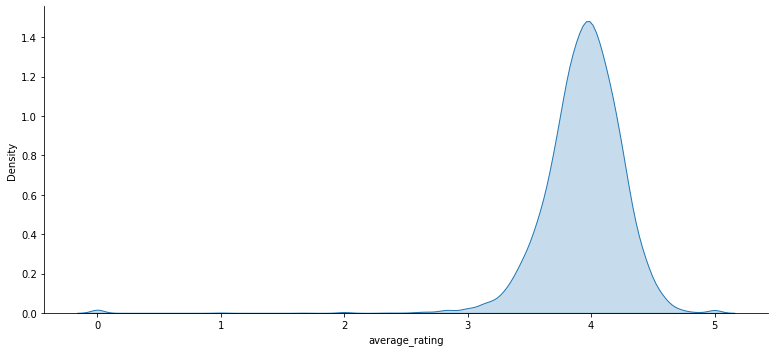

In [27]:
g=sns.displot(df_cpy,x='average_rating',kind='kde',fill=True);
g.fig.set_figwidth(12)

In [28]:
df_cpy.groupby('authors')['average_rating'].mean().sort_values(ascending=False).head(20)

authors
Dennis Adler/R.L. Wilson                                5.00
Chris    Green/Chris Wright/Paul Douglas Gardner        5.00
Nicholas    Evans/Rhonda  Evans                         5.00
Middlesex Borough Heritage Committee                    5.00
Sheri Rose Shepherd                                     5.00
Sara Barton-Wood                                        5.00
Aristophanes/F.W. Hall/W.M. Geldart                     5.00
Todd Davis/Marc Frey                                    5.00
Ian        Martin/Katie Elliott                         5.00
Julie Sylvester/David Sylvester                         5.00
Keith Donohue                                           5.00
John  Diamond                                           5.00
Laura Driscoll/Alisa Klayman-Grodsky/Eric     Weiner    5.00
James E. Campbell                                       5.00
William C. Dowling                                      5.00
Ross Garnaut                                            5.00
R. McL. Wilson  

In [29]:
df_cpy.groupby('publisher')['average_rating'].mean().sort_values(ascending=False).head(20)

publisher
Vantage Press                      5.00
Courage Books                      5.00
Boosey & Hawkes Inc                5.00
Schirmer Mosel                     5.00
Academica Press                    5.00
Raintree                           5.00
Square One Publishers              5.00
Texas A&M University Press         5.00
T&T Clark Int'l                    5.00
Chartwell Books                    5.00
University Press of New England    5.00
Y Lolfa                            5.00
Welcome Books                      4.88
Teacher's Pet Publications         4.86
Universe Publishing(NY)            4.83
F. Meiner                          4.78
Skinner House Books                4.75
Steidl                             4.73
Four Ninety-Eight Productions      4.72
Zondervan Publishing House         4.70
Name: average_rating, dtype: float64

In [30]:
print("The number of author in the list are {}".format(df_cpy['authors'].duplicated().sum()))

The number of author in the list are 4484


In [31]:
print("The number of publishers in the list are {}".format(df_cpy['publisher'].duplicated().sum()))

The number of publishers in the list are 8833


Books which are most rated

In [32]:
rating=df_cpy[df_cpy['ratings_count']>1000000]

In [33]:
rating.head()

,bookID,title,authors,average_rating,isbn,isbn13,language,num_pages,ratings_count,text_reviews_count,publication_date,publisher,publication_year
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,English,652,2095690,27591,9/16/2006,Scholastic Inc.,2006
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,English,870,2153167,29221,9/1/2004,Scholastic Inc.,2004
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,English,435,2339585,36325,5/1/2004,Scholastic Inc.,2004
23,34,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. Tolkien,4.36,0618346252,9780618346257,English,398,2128944,13670,9/5/2003,Houghton Mifflin Harcourt,2003
284,865,The Alchemist,Paulo Coelho/Alan R. Clarke/Özdemir İnce,3.86,0061122416,9780061122415,English,197,1631221,55843,5/1/1993,HarperCollins,1993


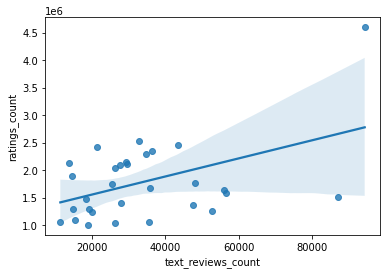

In [34]:
sns.regplot(x=rating["text_reviews_count"], y=rating["ratings_count"])
plt.show()

Creating a subset with favourite authors

In [35]:
sub_set=df_cpy[df_cpy['authors'].isin(['J.K. Rowling','Agatha Christie','Dan Brown'])]

In [36]:
sub_set.head(5)

,bookID,title,authors,average_rating,isbn,isbn13,language,num_pages,ratings_count,text_reviews_count,publication_date,publisher,publication_year
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,English,352,6333,244,11/1/2003,Scholastic,2003
6,10,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,4.73,0439827604,9780439827607,English,3342,28242,808,9/12/2005,Scholastic,2005
307,960,Angels & Demons (Robert Langdon #1),Dan Brown,3.89,1416524797,9781416524793,English,736,2418736,21303,4/1/2006,Pocket Books,2006
308,965,Ángeles y demonios (Robert Langdon #1),Dan Brown,3.89,849561877X,9788495618771,Spanish,508,196,20,12/1/2005,Umbriel,2005
310,968,The Da Vinci Code (Robert Langdon #2),Dan Brown,3.84,0307277674,9780307277671,English,489,1679706,35877,3/28/2006,Anchor,2006


In [37]:
sub_set=sub_set.drop(6)

In [38]:
sub_set.head()

,bookID,title,authors,average_rating,isbn,isbn13,language,num_pages,ratings_count,text_reviews_count,publication_date,publisher,publication_year
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,English,352,6333,244,11/1/2003,Scholastic,2003
307,960,Angels & Demons (Robert Langdon #1),Dan Brown,3.89,1416524797,9781416524793,English,736,2418736,21303,4/1/2006,Pocket Books,2006
308,965,Ángeles y demonios (Robert Langdon #1),Dan Brown,3.89,849561877X,9788495618771,Spanish,508,196,20,12/1/2005,Umbriel,2005
310,968,The Da Vinci Code (Robert Langdon #2),Dan Brown,3.84,0307277674,9780307277671,English,489,1679706,35877,3/28/2006,Anchor,2006
311,969,The Da Vinci Code,Dan Brown,3.84,076792603X,9780767926034,English,467,1120,105,3/28/2006,Broadway Books,2006


In [39]:
round(sub_set.groupby('authors')['num_pages'].mean(),2)

authors
Agatha Christie    319.88
Dan Brown          569.67
J.K. Rowling       467.20
Name: num_pages, dtype: float64

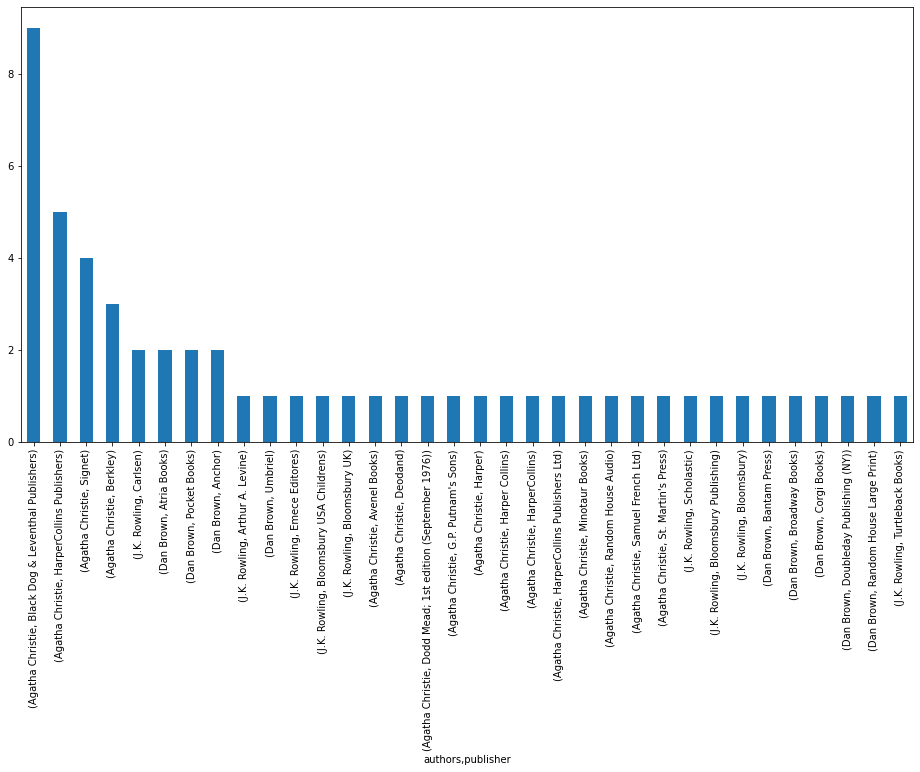

In [40]:
plt.figure(figsize=(16,8))
sub_set.groupby('authors')['publisher'].value_counts().sort_values(ascending=False).plot.bar()
plt.show()

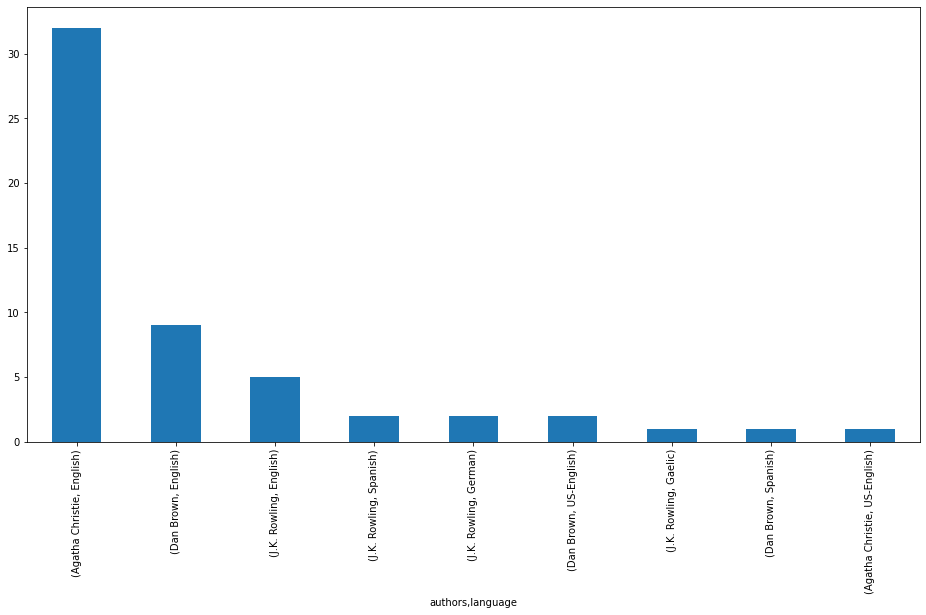

In [41]:
plt.figure(figsize=(16,8))
sub_set.groupby('authors')['language'].value_counts().sort_values(ascending=False).plot.bar()
plt.show()

In [42]:
from wordcloud import WordCloud, STOPWORDS
def word_cloud(author): 
  comment_words = ''
  stopwords = set(STOPWORDS)
  for val in sub_set.title[(sub_set['authors']==author)& (sub_set['language']!='German')]:
      val = str(val)
      tokens = val.split()
      for i in range(len(tokens)):
          tokens[i] = tokens[i].lower()
     
      comment_words += " ".join(tokens)+" "
 
  wordcloud = WordCloud(width = 400, height = 400,
                  background_color ='white',
                  stopwords = stopwords,
                  min_font_size = 8).generate(comment_words)
                     
  plt.figure(figsize = (5, 5), facecolor = 'k')
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad=0)
 
  plt.show()

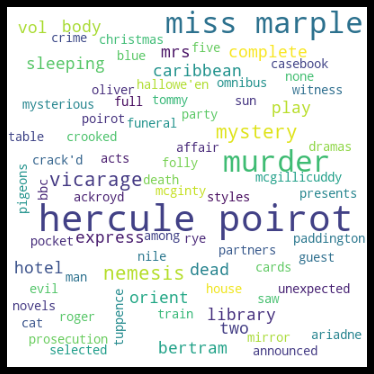

In [43]:
word_cloud('Agatha Christie')

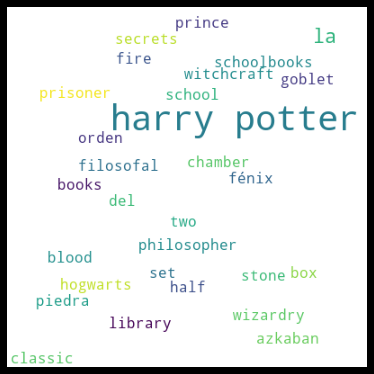

In [44]:
word_cloud('J.K. Rowling')

Feature engineering

Making buckets of ratings.

In [45]:
df_cpy.loc[ (df_cpy['average_rating'] >= 0) & (df_cpy['average_rating'] <= 1), 'rating_between'] = "0-1"
df_cpy.loc[ (df_cpy['average_rating'] > 1) & (df_cpy['average_rating'] <= 2), 'rating_between'] = "1-2"
df_cpy.loc[ (df_cpy['average_rating'] > 2) & (df_cpy['average_rating'] <= 3), 'rating_between'] = "2-3"
df_cpy.loc[ (df_cpy['average_rating'] > 3) & (df_cpy['average_rating'] <= 4), 'rating_between'] = "3-4"
df_cpy.loc[ (df_cpy['average_rating'] > 4) & (df_cpy['average_rating'] <= 5), 'rating_between'] = "4-5"

In [46]:
df_cpy.head()

,bookID,title,authors,average_rating,isbn,isbn13,language,num_pages,ratings_count,text_reviews_count,publication_date,publisher,publication_year,rating_between
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,English,652,2095690,27591,9/16/2006,Scholastic Inc.,2006,4-5
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,English,870,2153167,29221,9/1/2004,Scholastic Inc.,2004,4-5
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,English,352,6333,244,11/1/2003,Scholastic,2003,4-5
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,English,435,2339585,36325,5/1/2004,Scholastic Inc.,2004,4-5
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,English,2690,41428,164,9/13/2004,Scholastic,2004,4-5


In [47]:
rating_df = pd.get_dummies(df_cpy['rating_between'])
rating_df.head(10)

,0-1,1-2,2-3,3-4,4-5
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1
5,0,0,0,1,0
6,0,0,0,0,1
7,0,0,0,0,1
8,0,0,0,0,1
9,0,0,0,0,1


In [48]:
language_df = pd.get_dummies(df_cpy['language'])
language_df.head()

,Afro-Asiatic,British-English,Canada-English,Chinese,Dutch,English,French,Gaelic,Galician,German,Greek,Initial teaching language,Latvian,Middle English,Modern Standard Arabic,Multiple language,Murik,Portuguese,Serbian,Spanish,Swedish,Turkish,US-English,Welsh,arabic,japanese,russian
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [49]:
features = pd.concat([rating_df, language_df, df_cpy['average_rating'], df_cpy['ratings_count']], axis=1)
features.head()

,0-1,1-2,2-3,3-4,4-5,Afro-Asiatic,British-English,Canada-English,Chinese,Dutch,English,French,Gaelic,Galician,German,Greek,Initial teaching language,Latvian,Middle English,Modern Standard Arabic,Multiple language,Murik,Portuguese,Serbian,Spanish,Swedish,Turkish,US-English,Welsh,arabic,japanese,russian,average_rating,ratings_count
0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.57,2095690
1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.49,2153167
2,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.42,6333
3,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.56,2339585
4,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.78,41428


In [50]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import neighbors

In [51]:
min_max_scaler = MinMaxScaler()
features = min_max_scaler.fit_transform(features)

In [52]:
model = neighbors.NearestNeighbors(n_neighbors=8, algorithm='auto')
model.fit(features)
dist, idlist = model.kneighbors(features)

Defining Recommender system.

In [53]:
def Recommender(name):
    book_list = []
    book_id = df_cpy[df_cpy['title'] == name].index
    book_id = book_id[0]
    for newid in idlist[book_id]:
        book_list.append(df_cpy.loc[newid].title)
    print("Recommended books are:")
    for i in range(0,len(book_list)):
      print(f"{i+1}){book_list[i]}")

PREDICTIONS

So here are our recommendations!

In [54]:
Recommender('Harry Potter and the Half-Blood Prince (Harry Potter  #6)')

Recommended books are:
1)Harry Potter and the Half-Blood Prince (Harry Potter  #6)
2)Harry Potter and the Order of the Phoenix (Harry Potter  #5)
3)The Fellowship of the Ring (The Lord of the Rings  #1)
4)Harry Potter and the Chamber of Secrets (Harry Potter  #2)
5)Harry Potter and the Prisoner of Azkaban (Harry Potter  #3)
6)The Lightning Thief (Percy Jackson and the Olympians  #1)
7)The Hobbit  or There and Back Again
8)The Book Thief


In [55]:
Recommender("At Bertram's Hotel")

Recommended books are:
1)At Bertram's Hotel
2)Berserkers: The Beginning (Berserkers  #1 & #5)
3)Aftershock  (Sweet Valley High Super Edition  #12)
4)Scribble  Scribble: Notes on the Media
5)The Arms of Hercules (Book of the Gods  #3)
6)Oedipus Tyrannus
7)Worlds Enough and Time (Worlds #3)
8)Now and on Earth


In [56]:
def author_Recommender(author):
    auth_list = []
    books=[]
    auth_id = df_cpy[df_cpy['authors'] == author].index
    auth_id = auth_id[0]
    for newid in idlist[auth_id]:
        auth_list.append(df_cpy.loc[newid].authors)
        books.append(df_cpy.loc[newid].title)
    for i in range(0,len(auth_list)):
      print(f"{i+1})Author:{auth_list[i]},\nrecommended book:{books[i]}")

PRECIDTIONS

Here comes our Recommended Authors.

In [57]:
author_Recommender('Stephen King')

1)Author:Stephen King,
recommended book:The Drawing of the Three (The Dark Tower  #2)
2)Author:Neil Gaiman/Sam Kieth/Mike Dringenberg/Malcolm Jones III/Todd Klein/Karen  Berger,
recommended book:Preludes & Nocturnes (The Sandman  #1)
3)Author:Pat Conroy,
recommended book:The Prince of Tides
4)Author:Kahlil Gibran/جبران خليل جبران/Jihad El,
recommended book:The Prophet
5)Author:Robert Jordan,
recommended book:The Dragon Reborn (The Wheel of Time  #3)
6)Author:Robert Jordan,
recommended book:The Shadow Rising (The Wheel of Time  #4)
7)Author:Douglas Adams,
recommended book:Life  the Universe and Everything (Hitchhiker's Guide to the Galaxy  #3)
8)Author:Stephen King/Ned Dameron,
recommended book:The Waste Lands (The Dark Tower  #3)


In [58]:
author_Recommender('Agatha Christie')

1)Author:Agatha Christie,
recommended book:Cards on the Table (Hercule Poirot  #15)
2)Author:Donald Miller,
recommended book:Searching for God Knows What
3)Author:Aldous Huxley,
recommended book:The Doors of Perception & Heaven and Hell
4)Author:Joseph J. Ellis,
recommended book:American Sphinx: The Character of Thomas Jefferson
5)Author:Garth Nix,
recommended book:Lady Friday (The Keys to the Kingdom  #5)
6)Author:Natsuo Kirino/Stephen Snyder,
recommended book:Out
7)Author:Stephen King,
recommended book:Storm of the Century
8)Author:Joseph J. Ellis,
recommended book:His Excellency: George Washington


In [59]:
author_Recommender('Dan Brown')

1)Author:Dan Brown,
recommended book:Angels & Demons (Robert Langdon  #1)
2)Author:J.D. Salinger,
recommended book:The Catcher in the Rye
3)Author:George Orwell/Boris Grabnar/Peter Škerl,
recommended book:Animal Farm
4)Author:William Golding,
recommended book:Lord of the Flies
5)Author:William Shakespeare/Paul Werstine/Barbara A. Mowat,
recommended book:Romeo and Juliet
6)Author:John Steinbeck,
recommended book:Of Mice and Men
7)Author:Dan Brown,
recommended book:The Da Vinci Code (Robert Langdon  #2)
8)Author:Paulo Coelho/Alan R. Clarke/Özdemir İnce,
recommended book:The Alchemist


KMeans clustering

In [61]:
X = df[['average_rating', 'ratings_count']].values

In [63]:
from scipy.cluster.vq import kmeans, vq

from sklearn.cluster import KMeans

from collections import Counter

In [64]:
distorsions = []

for x in range (2, 31):
    k_means = KMeans(n_clusters=x)
    k_means.fit(X)
    distorsions.append(k_means.inertia_)

In [77]:
import plotly as py
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

In [78]:
print("plotly version: ", py.__version__)


plotly version:  4.4.1


In [81]:
centroids, _ = kmeans(X, 5) # making 5 clusters
idx, _ = vq(X, centroids)

In [83]:
df['clusters'] = idx

In [88]:
fig = px.scatter(data_frame=df, x='average_rating', y='ratings_count', color='clusters',
          hover_data=['title'],height=700)

fig.update_coloraxes(showscale=False)


fig.update_layout(xaxis=dict(title='average rating'),
                 yaxis=dict(title='ratings_count'),
                 title=dict(text='Goodreads - clustering', x=.5, 
                           font=dict(size=30)),
                 font=dict(family='Lato', size=16))

fig

From the plot above, we can see that the whole system can be classified to the clusters. As the count increases, the rating would end up near the cluster given above. As the rating count seems to decrease, the average rating seems to become sparser, with higher volatility and less accuracy.